In this notebook we read in the Master XML file made using NapaTrackMater and create N, Delta times Attribute dimensional vectors. N being the number of tracks present in the chosen region, R, Delta being the chosen time interval (t_minus + t_plus) {t - t_minus, t + t_plus} and Attributes being the morphological and the dynamic properties associated with cells in the tracks. We concatenate the Attribute componenets over the chosen time interval to create a Delta times Attribute dimensional vector and create a pandas dataframe with these vectors for further analysis.

In [ ]:
!pip install napatrackmater
!pip install git+https://github.com/kapoorlab/cellshape-helper
!pip install git+https://github.com/kapoorlab/cellshape-cloud
!pip install git+https://github.com/kapoorlab/cellshape-cluster    

In [7]:
%gui qt5
from napatrackmater.Trackvector import TrackVector
from pathlib import Path
from ipywidgets import interactive, widgets
from IPython.display import display
import napari 
from tifffile import imread
import pandas as pd


In [2]:
master_xml_path = Path('C:/Users/rando/Downloads/Mari_project/gt/master_gt_star_hyperstack.xml')
spot_csv_path = Path('C:/Users/rando/Downloads/Mari_project/gt/spots.csv')
track_csv_path = Path('C:/Users/rando/Downloads/Mari_project/gt/tracks.csv')
edges_csv_path = Path('C:/Users/rando/Downloads/Mari_project/gt/edges.csv')
image = imread('C:/Users/rando/Downloads/Mari_project/gt/rawk.tif')
show_tracks = True

In [3]:
viewer = napari.Viewer()
track_vectors = TrackVector(viewer,image,master_xml_path,spot_csv_path, track_csv_path, edges_csv_path, show_tracks = show_tracks)

Reading Master XML
Iterating over spots in frame
Iterating over tracks 547
getting attributes
obtianed spot attributes
obtained track attributes
obtained edge attributes


In [4]:
def track_setter(deltat, deltax, deltay):
    track_vectors.t_minus = deltat[0]
    track_vectors.t_plus = deltat[-1]
    
    track_vectors.x_start = deltax[0]
    track_vectors.x_end = deltax[-1]
    
    track_vectors.y_start = deltay[0]
    track_vectors.y_end = deltay[-1]
    

In [5]:
track_vector_widgets = interactive(track_setter, deltat = widgets.IntRangeSlider(
    value=[track_vectors.tstart, track_vectors.tend],
    min= track_vectors.tstart,
    max=track_vectors.tend,
    step=1,
    description='Delta Time',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
), 
    deltax = widgets.IntRangeSlider(
    value=[track_vectors.xmin, track_vectors.xmax],
    min= track_vectors.xmin,
    max=track_vectors.xmax,
    step=1,
    description='Delta X',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
), 
    deltay = widgets.IntRangeSlider(
    value=[track_vectors.ymin, track_vectors.ymax],
    min= track_vectors.ymin,
    max=track_vectors.ymax,
    step=1,
    description='Delta Y',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
),                               
                                  
                                  )

track_vector_widgets

interactive(children=(IntRangeSlider(value=(0, 265), continuous_update=False, description='Delta Time', max=26…

In [6]:
track_vectors._interactive_function()

returning shape vectors as list 40
returning dynamic vectors as list 40


In [14]:
current_shape_vectors = track_vectors.current_shape_vectors
current_dynamic_vectors = track_vectors.current_dynamic_vectors

In [37]:
global_shape_dataframe = []
for i in range(len(current_shape_vectors)):
   shape_dataframe = pd.DataFrame(current_shape_vectors[i], index =['Time', 'Radius', 'Volume', 'Cluster Class', 'Cluster Score'])
   if len(global_shape_dataframe) == 0:
        global_shape_dataframe = shape_dataframe
   else:
        global_shape_dataframe = pd.concat([global_shape_dataframe, shape_dataframe],ignore_index=False)

In [50]:
global_dynamic_dataframe = []
for i in range(len(current_dynamic_vectors)):
   dynamic_dataframe = pd.DataFrame(current_dynamic_vectors[i], index =['Time', 'Speed', 'Directional_Change_Rate', 'Acceleration'])
   if len(global_dynamic_dataframe) == 0:
        global_dynamic_dataframe = dynamic_dataframe
   else:
        global_dynamic_dataframe = pd.concat([global_dynamic_dataframe, dynamic_dataframe],ignore_index=False)

NameError: name 'plt' is not defined

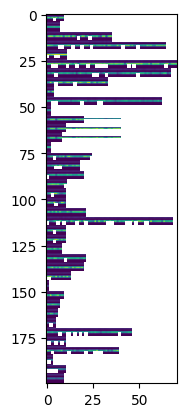

In [52]:
from matplotlib.pyplot import imshow
import m
imshow(global_shape_dataframe)
plt.show()
imshow(global_dynamic_dataframe)

200